# Deep learning 

Traditional machine learning uses hand crafted machine learning.

Deep learning enables feature learning from data in not only tabular data but text, audio and images.

Deep learning is inspired by the connections in the human brain.

Deep learning models require a larger amount of data compared to traditional machine learning to learn patterns.

# Pytorch 

Widely used by researchers.

**Tensors** are the building blocks of networks in PyTorch.

In [ ]:
import torch

import numpy as np 
import pandas as pd

import seaborn as sns

In [ ]:
lst = [[1,2,3],[4,5,6]]
tensor = torch.tensor(lst)

np_array = np.array(lst)
np_tensor = torch.from_numpy(np_array)

In [ ]:
tensor.shape

In [ ]:
tensor.dtype

In [ ]:
tensor.device

In [ ]:
a = [[1,2,3],[4,5,6]]
b = [[1,2,3],[4,5,6]]

tensor_a = torch.tensor(a)
tensor_b = torch.tensor(b)

tensor_a+tensor_b

In [ ]:
a = [[1,2,3],[4,5,6]]
b = [[1,2],[4,5]]

tensor_a = torch.tensor(a)
tensor_b = torch.tensor(b)

tensor_a+tensor_b

In [ ]:
a = [[1,2,3],[4,5,6]]
b = [[1,2,3],[4,5,6]]

tensor_a = torch.tensor(a)
tensor_b = torch.tensor(b)

# element by element product
tensor_a*tensor_b

# First Neural Network 



In [ ]:
import torch.nn as nn

input_tensor = torch.tensor([[0.3, 0.4, -0.23]])

# A linear layer takes an input, applies a linear function and returns an output
linear_layer = nn.Linear(in_features=3, out_features=2)

# Pass the input through linear layer 
output = linear_layer(input_tensor)
print(output)

In [ ]:
linear_layer.weight

In [ ]:
linear_layer.bias

For input $X$, weights $W_0$ and bias $b_0$, the linear layer performs:

$$
y_0 = W_0 \cdot X + b_0
$$

In PyTorch:
```python
output = W0 @ input + b0
```

- Weights and biases are initialized randomly.
- They are not useful until they are tuned.

The input dimensions of our nn is 1x3
The output dimensions is 1x2

Networks with only linear layers are called fully connected: each neuron in one layer is connected to each neuron in the next layer.

## Stacking layers with nn.Sequential()


In [ ]:
model = nn.Sequential(
    nn.Linear(10,18),
    nn.Linear(18,20),
    nn.Linear(20,5)
)

input_tensor = torch.tensor([[0.3, 0.4, -0.23, 0.3, 0.4, -0.23, 0, 0.4, -0.23, 0]])

output_tensor = model(input_tensor)

print(output_tensor)

# Activation Functions 

Activation functions do not have to be always linear. They allow to introduce non-linearity to the network, enabling the model to learn more complex relationships.

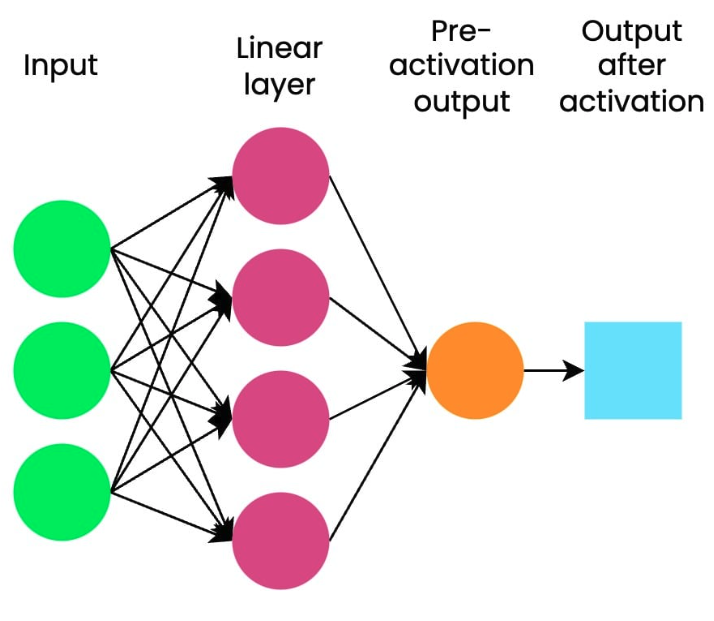

## Sigmoid activation function

Useful for binary classification since it returns numbers between 0 and 1.

The sigmoid activation goes as last step, and is equivalent to logistic regression.


In [ ]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid() 
output = sigmoid(input_tensor)
output

## Softmax activation function

In the case of multiclass classification the preferred activation function is the softmax.

It takes vectors of n elements and outputs vectors of the same size

If the output has n elements, the softmax layer has to have n elements too.

The outputs are between 0 and 1 and sum to 1.

The element with the highest probability indicates the output class.

In [ ]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[6.0, 2.1, 6.5]])

probabilities = nn.Softmax(dim=-1) 
output = probabilities(input_tensor)
output

# Running a forward pass

Input data is passed forward or progagated through a network.

Computations are performed at each layer, and their outputs are passed to each subsequent layer.

The output of the final layer is called **prediction**

These forward passes are used for both training and prediction.

Depending on the type of problem at hand the output could be: 
- **Binary Classification**: single probability between 0 and 1
- **Multiclass Classification**: distribution of probabilities summing to 1
- **Regression**: continuous numerical predictions

# Backward pass

The backward pass or backpropagation is used to update weights and biases during training

In the *training loop* we:
1. Propagate data forward
2. Compare outputs to true values (ground truth)
3. Backpropagate to update model weights and biases
4. Repeat until weights and biases are tuned to produce useful outputs

## Binary Classification

In [ ]:
input_data = torch.tensor(
    [[-0.4, 1.5, 2.0,  2.3, 1.4, 0.0], 
     [-2.4, 6.5, 1.0,  4.3, 2.4, 2.0], 
     [-1.4, 4.5, 2.0, -2.3, 3.4, 5.0], 
     [-4.4, 2.5, 3.0, -1.3,-3.4, 1.0], 
    ]
)

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1), 
    nn.Sigmoid()
)

output = model(input_data)
output

Above 0.5 -> class 1
Below 0.5 -> class 0

# Multiclass Classification

In [ ]:
input_data = torch.tensor(
    [[-0.4, 1.5, 2.0,  2.3, 1.4, 0.0], 
     [-2.4, 6.5, 1.0,  4.3, 2.4, 2.0], 
     [-1.4, 4.5, 2.0, -2.3, 3.4, 5.0], 
     [-4.4, 2.5, 3.0, -1.3,-3.4, 1.0], 
    ]
)

n_classes = 3

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,n_classes), 
    nn.Softmax(dim=-1)
)

output = model(input_data)
output

The value with highest probability is assigned predicted label in each row.

# Regression 



In [ ]:
input_data = torch.tensor(
    [[-0.4, 1.5, 2.0,  2.3, 1.4, 0.0], 
     [-2.4, 6.5, 1.0,  4.3, 2.4, 2.0], 
     [-1.4, 4.5, 2.0, -2.3, 3.4, 5.0], 
     [-4.4, 2.5, 3.0, -1.3,-3.4, 1.0], 
    ]
)

n_classes = 3

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4, 1) 
)

output = model(input_data)
output

# Loss Functions

Loss Functions give feedback to model during training

Takes in model prediction and ground truth and outputs a float

The loss function is higher as the prediction is wronger

The objective of training is to minimize this loss

## One hot encoding in PyTorch

In order to compare the output of a multiclass classifier, we have to encode the expected output as a tensor.

In [ ]:
import torch.nn.functional as F 

F.one_hot(torch.tensor(0), num_classes=3)

In [ ]:
F.one_hot(torch.tensor(1), num_classes=3)

# Cross Entropy Loss 

Cross Entropy Loss is the most used loss function when doing classification

In [ ]:
from torch.nn import CrossEntropyLoss 

scores = torch.tensor([[-0.12, 0.104]])
one_hot_target = torch.tensor([[1,0]])

criterion = CrossEntropyLoss() 
criterion(scores.double(), one_hot_target.double())

# Using Derivatives to update model parameters

There are loss functions with a single minimum. Others have more than one. The goal of the training process is to find the global minimum.

To find the global minimum of those functions with more than one minimum (non-convex functions) we will use an iterative process such as **gradient descent**. 

In Pytorchm and **optimizer** takes care of weight updates 

The most common optimizer is stochastic gradient descent (SGD)

Optimizer handles updating model parameters (or weights) after calculation of local gradients.

In [ ]:
import torch.optim as optim 

optimizer = optim.SGD(model.parameters(), lr=0.001)

optimizer.step()

# Training a neural network

1. Create a model
2. Choose a loss function
3. Create a dataset
4. Define an optimizer
5. Run a training loopm where for each sample of the dataset, we repeat:
   - Calculating loss
   - Calculating local gradients
   - Updating model parameters

# Mean Squared Error Loss

Is the squared difference between the prediction and the ground truth

# Before the training loop

In [ ]:
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch import optim

df = pd.read_csv('../data/water_potability.csv')
features = df.drop(['Potability'], axis=1).values
target = df[['Potability']].values

# Create the dataset and the dataloader
dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
# Create the model
model = nn.Sequential(
    nn.Linear (9, 20),
    nn.Linear (20, 10),
    nn.Linear (10, 1),
    nn.Sigmoid()
)
# Create the loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
num_epochs=10

# Loop through the dataset multiple times
for epoch in range(num_epochs) : 
    for data in dataloader:
        # Set the gradients to zero
        optimizer.zero_grad()
        # Get feature and target from the data loader
        feature, target = data
        # Run a forward pass
        pred = model(feature)
        # Compute loss and gradients
        loss = criterion (pred, target)
        loss.backward()
        # Update the parameters
        optimizer.step()


def show_results(model, dataloader):
    model.eval()
    iter_loader = iter(dataloader)
    for _ in range(3):
        feature, target = next(iter_loader)
        preds = model(feature)
        for p, t in zip(preds, target):
            print(f'Ground truth potability: {t.item():.3f}. Predicted potability: {p.item():.3f}.')


show_results(model, dataloader)

In [ ]:
sns.pairplot(df, hue='Potability')

### Limitations of Softmax and Sigmoid Functions

Both the softmax and sigmoid activation functions can suffer from the **vanishing gradient problem** due to their saturation behavior. Here's how it works:

1. **Sigmoid Saturation**:
   The sigmoid function outputs values between $0$ and $1$. When the input values are very large (positive or negative), the function saturates — that is, the gradient approaches zero:
   
   - For large positive inputs, $\sigma(x) \approx 1$
   - For large negative inputs, $\sigma(x) \approx 0$
   
   In these regions, the gradient (the derivative of the sigmoid) becomes very small, leading to **vanishing gradients**. As a result, during backpropagation, the weights are updated minimally, slowing down or even stalling the learning process.

   Formula:
   $$
   \sigma(x) = \frac{1}{1 + e^{-x}}
   $$

2. **Softmax Saturation**:
   Softmax converts a vector of inputs into probabilities, where each value lies between $0$ and $1$. When the input values are very large or very small, softmax tends to produce very confident predictions (close to $0$ or $1$), leading to saturation.

   In this case, only one class dominates the output, and the gradient for other classes becomes very small, leading to vanishing gradients.

   Formula:
   $$
   \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j}e^{x_j}}
   $$

### Vanishing Gradient Problem
In both functions, during backpropagation, if the gradients shrink significantly (especially in deep networks), the model becomes unable to update the weights effectively, slowing down or halting learning. This is why alternative activation functions, like ReLU, are often used in deep learning models, as they help mitigate the vanishing gradient issue.

### ReLU (Rectified Linear Unit)

The **Rectified Linear Unit (ReLU)** is one of the most commonly used activation functions in deep learning. Unlike the sigmoid or softmax functions, ReLU helps to mitigate the **vanishing gradient problem** by avoiding the saturation regions seen in those functions.

#### ReLU Formula
The ReLU function is defined as:

$$
f(x) = \max(0, x)
$$

This means that if the input is positive, the output is the same as the input. If the input is negative, the output is zero.

#### Advantages of ReLU
1. **Non-saturating nature**: Unlike sigmoid and softmax, ReLU does not saturate in the positive region. This allows for better gradient flow during backpropagation, as the derivative of ReLU is either $1$ (when $x > 0$) or $0$ (when $x < 0$). This ensures that the gradients do not vanish in most cases.

2. **Efficient computation**: ReLU is computationally efficient because it only requires a simple thresholding operation ($\max(0, x)$), making it faster to compute compared to other activation functions like sigmoid or softmax.

#### The Gradient of ReLU
The derivative of ReLU is simple:

```
\frac{d}{dx} f(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
```

Thus, for inputs greater than zero, ReLU allows the gradient to pass through during backpropagation, which avoids the vanishing gradient problem. However, for inputs less than or equal to zero, the gradient is zero, which can lead to **dead neurons** (neurons that never activate during training).

#### Limitations of ReLU
1. **Dead neurons**: If the input to a neuron is always negative, ReLU will output zero, and its gradient will be zero during backpropagation. This can lead to **dead neurons**, which never update during training, effectively rendering some neurons inactive.
   
2. **Exploding gradients**: While ReLU helps prevent vanishing gradients, it can lead to **exploding gradients** in deep networks if the inputs grow too large.

#### Variants of ReLU
To address the dead neuron problem, several variants of ReLU have been introduced:

- **Leaky ReLU**: Instead of outputting zero for negative inputs, Leaky ReLU allows a small negative slope:
  ```
  f(x) = 
  \begin{cases}
  x & \text{if } x > 0 \\
  \alpha x & \text{if } x \leq 0
  \end{cases}
  ```
  Here, $\alpha$ is a small constant (e.g., 0.01) that prevents the neuron from dying completely.

- **Parametric ReLU (PReLU)**: Similar to Leaky ReLU, but the slope for negative inputs is learned during training rather than being fixed.

- **Exponential Linear Unit (ELU)**: ELU allows negative values, but instead of a linear slope, it applies an exponential decay for negative inputs.

# Neural Network Architecture 

The number of neurons in the input layer is determined by the number of features we have

The number of neurons in the output layer depends on the number of classes we are modelling

We can use as many hidden layers as we want

Increasing the number of hidden layers increases the number of parameters and the model capacity.



# Learning Rate and Momentum 

Training a neural network is solving an optimization problem 

The Stochastic Gradient Descent optimizer has 2 parameters: 
- **learning rate**: controls the step size
- **momentum**: controls the intertia of the optimizer. Typical values between 0.85 and 0.99

Bad values of these two parameters can lead to long training times or bad overall performances 


# Layer Initialization 

Layer weights are initialized to small values 

The outputs of a layer would explode if the inputs and the weights are not normalized 



In [ ]:
import torch.nn as nn 

layer = nn.Linear(64, 128)
print(layer.weight.min(), layer.weight.max())


In [ ]:
import torch.nn as nn 

layer = nn.Linear(64, 128)
nn.init.uniform_(layer.weight)

print(layer.weight.min(), layer.weight.max())

# Transfer Learning 

Reusing a model trained on a first task for a second similar tasks to accelerate the training process

Fine-tuning is a type of transfer learning. Not every layer is trained (we freeze the first ones)



# Loading Data 



In [ ]:
df = pd.read_csv('../data/zoo/zoo.csv')
df_small = df[['hair', 'feathers', 'eggs', 'milk', 'predator', 'fins', 'legs', 'tail', 'class_type']]
X = df_small.iloc[:,:-1].to_numpy()
y = df_small[['class_type']].to_numpy()

In [ ]:
import torch
from torch.utils.data import TensorDataset

dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

In [ ]:
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

In [ ]:
sample = dataset[0] 
input_sample, label_sample = sample 
print('input sample:', input_sample)
print('label sample:', label_sample)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 20      # number of samples per iteration
shuffle = True 

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

#for batch_inputs, batch_labels in dataloader: 
    #print('batch inputs', batch_inputs)
    #print('batch labels', batch_labels)


In [ ]:
# Create the model
model = nn.Sequential(
    nn.Linear (8, 20),
    nn.Linear (20, 10),
    nn.Linear (10, 1),
    nn.Softmax()
)
# Create the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Evaluating Model Performance 

Training-Validation-Testing

During training the models parameters are adjunsted

During Validation we tune hyperparameters

The test set is only used to calculate final metrics.

## Calculating Training Loss

For each epoch, we sum up the loss for each iteration of the training set dataloader

At the end of the epoch we calculate the mean training loss 

## Calculating Validation Loss

Very similar to the training loss, but disabling the update of the weights.

Keeping track of the validation and training loss allows us to identify overfitting.

In [ ]:
model

In [ ]:
# NOTE: the dataloader to be used here should be a validationloader thingy
# Set the model to evaluation mode
model.eval()
validation_loss = 0.0

with torch.no_grad():
  
  for data in dataloader:
    
      outputs = model(data[0])
      loss = criterion(outputs, data[1])
      
      # Sum the current loss to the validation_loss variable
      validation_loss += loss.item()
      
# Calculate the mean loss value
validation_loss_epoch = validation_loss/len(dataloader)
print(validation_loss_epoch)

# Set the model back to training mode
model.train()

## TorchMetrics 

In [ ]:
import torchmetrics 

metric = torchmetrics.Accuracy(task='multiclass', num_classes=3)

for i, data in enumerate(dataloader, 0):
    features, labels = data 
    outputs = model(features)

    acc=metric(outputs, labels.argmax(dim=-1))

# Overfitting

Overfitting could be caused by: 
- Dataset too small
- Model has too much capacity
- Weights are too large

Strategies to avoid overfitting are: 
- Reducing model size or adding dropout layer
- Using weight decay to force parameters to remain small
- Obtaining new data or augmenting data

Dropout layers add some sort of regularization and are added **after** the activation function. 

Dropout behaves differently during training and evaluation. Its important to remember switching from model.train() to model.eval() 

Weight_decay can be implemented via a parameter in the SGD optimizer.



In [ ]:
model = nn.Sequential(
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Dropout(p=0.5)
)
features = torch.randn((1, 8))
model(features)

### Improving Model Performance

In this guide, we will bring together key concepts to effectively tackle deep learning challenges by following a structured process to maximize performance.

When faced with a deep learning task, a step-by-step approach ensures optimal results. First, create a model that overfits the training set to verify the problem's solvability. Then, focus on reducing overfitting to improve validation performance and finally fine-tune hyperparameters to achieve the best possible outcome.

#### 1. Overfit the Training Set

Start by overfitting a single data point to check for bugs and ensure that the model works correctly. If the model achieves high accuracy and low loss, proceed to overfit the entire training set. Use a large enough pre-existing model and keep hyperparameters at their defaults for this step.

#### 2. Reduce Overfitting

Once overfitting confirms that the problem is solvable, the next step is to reduce overfitting and improve validation accuracy. Common techniques include dropout, data augmentation, weight decay, and reducing model capacity. It’s essential to track metrics for each experiment to ensure progress.

#### 3. Fine-Tune Hyperparameters

After achieving good baseline performance, fine-tune hyperparameters to optimize the model. If resources allow, use grid search to explore parameter values systematically, or opt for random search, which often yields better results. Focus on tuning optimizer parameters such as learning rate and momentum.
